## Discussion related with outliers and impact on machine learning 

#### Witch machine learning models are sensitive to outliers ?
1. Naivye Bayes classifier --------------------- Not Snsitive to Outlier
2. SVM ----------------------------------------- Not Sensitive to Outlier
3. Linear Regression --------------------------- Sensitive to Outlier
4. Logistic Regression ------------------------- Sensitive to Outlier
5. Decision Tree Regressor or Classifier ------- Not Sensitive to Outlier
6. Ensemble(RF, Xgboost, GB) ------------------- Not Sensitive to Outlier
7. KNN ----------------------------------------- Not Sensitive to Outlier
8. Kmeans -------------------------------------- Sensitive to Outlier
9. Hierarichal --------------------------------- Sensitive to Outlier
10. PCA ---------------------------------------- Sensitive to Outlier
11. Neural Networks----------------------------- Sensitive to Outlier

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.Age.isnull().sum()

177

In [7]:
import seaborn as sns

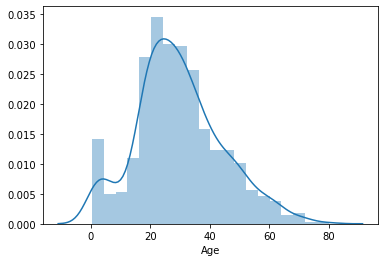

In [8]:
sns.distplot(df['Age'].dropna())

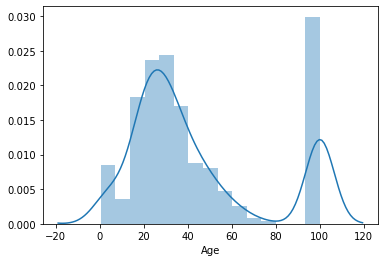

In [9]:
sns.distplot(df.Age.fillna(100))

#### Gussion Distributed

Text(0, 0.5, 'no of pessengers')

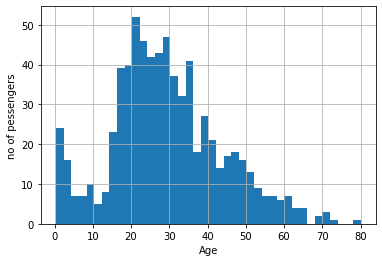

In [10]:
figure=df.Age.hist(bins=40)
figure.set_title=('Age')
figure.set_xlabel('Age')
figure.set_ylabel('no of pessengers')

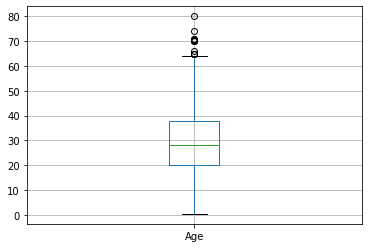

In [13]:
figure=df.boxplot(column='Age')

In [15]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### If the data is normally distributed we use this

In [17]:
#### Assuming Age follows a Gussion Distribution we will calculate the boundaries which differentiates the outliers 

lower_boundary=df.Age.mean() - 3* df['Age'].std()
upper_boundary=df.Age.mean() - 3* df['Age'].std()
print(lower_boundary), print(upper_boundary), print(df.Age.mean())

-13.88037434994331
-13.88037434994331
29.69911764705882


(None, None, None)

### If Feature are skewed we use below technique

Text(0, 0.5, 'no of pessengers')

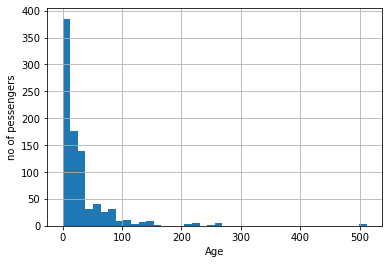

In [21]:
figure=df.Fare.hist(bins=40)
figure.set_title=('Age')
figure.set_xlabel('Age')
figure.set_ylabel('no of pessengers')

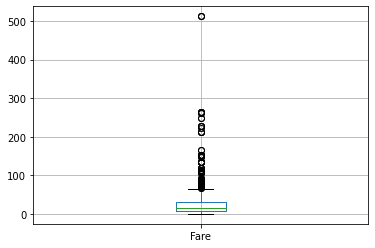

In [22]:
figure=df.boxplot(column='Fare')

In [24]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
#### Let's compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [26]:
####  Extreme Outliers
lower_bridge=df.Fare.quantile(0.25) - (IQR*3)
upper_bridge=df.Fare.quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [27]:
data=df.copy()

In [28]:
data.loc[data['Age']>73,'Age']=73

In [29]:
data.loc[data['Fare']>100,'Fare']=100

Text(0, 0.5, 'no of pessengers')

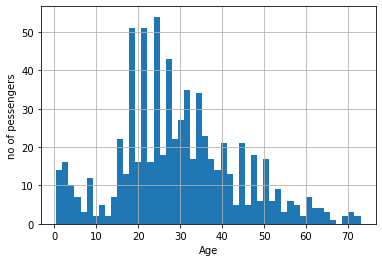

In [32]:
figure=data.Age.hist(bins=50)
figure.set_title=('Age')
figure.set_xlabel('Age')
figure.set_ylabel('no of pessengers')

Text(0, 0.5, 'no of pessengers')

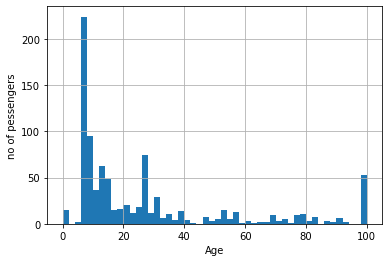

In [33]:
figure=data.Fare.hist(bins=50)
figure.set_title=('Age')
figure.set_xlabel('Age')
figure.set_ylabel('no of pessengers')

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [37]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(f" accuracy_score : {accuracy_score(y_test,y_pred)}")
print(f"roc_auc_score :{roc_auc_score(y_test,y_pred1[:,1])} ")

 accuracy_score : 0.6902985074626866
roc_auc_score :0.7019432272813868 


In [39]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print(f" accuracy_score : {accuracy_score(y_test,y_pred)}")
print(f"roc_auc_score :{roc_auc_score(y_test,y_pred1[:,1])} ")

 accuracy_score : 0.6343283582089553
roc_auc_score :0.6894011557757033 
